In [1]:
import os
import datetime
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import glob
import scipy.io as sio

import netCDF4 as nc
from salishsea_tools import (tidetools, teos_tools)
from nowcast import (analyze, figures, research_ferries_test as rft)

%matplotlib inline

In [2]:
from importlib import reload

In [3]:
period = '1h'
grid = 'grid_T'
dmy = '14dec15'
date = datetime.datetime.strptime(dmy, "%d%b%y")
dayf = date - datetime.timedelta(days=1)
dmyf = dayf.strftime('%d%b%y').lower()
print(dmyf)

13dec15


Step 0: Load the datasets and files that are available in nowcast/make_plots. 
These will be used as inputs, not to be reloaded in the module

In [4]:
grid_T_hr = nc.Dataset(analyze.get_filenames(date, date, period, grid, '/results/SalishSea/nowcast/')[0])
coastline = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_SS2_bathy_data()

## A : Preparing ferry data
Step 1: Get ferry data

In [5]:
route_name='TWDP'
start_time = date.replace(hour=rft.route[route_name]['start']['hour'], minute=rft.route[route_name]['start']['minute'])
end_time = date.replace(hour=rft.route[route_name]['end']['hour'], minute=rft.route[route_name]['end']['minute'])
print(start_time, end_time)

2015-12-14 02:00:00 2015-12-14 04:15:00


In [6]:
obs = rft._get_sal_data(route_name, dmyf)

Step 2: Slicing ferry data

In [7]:
obs_sal = rft.ferry_salinity(route_name, dmy)

## B: Preparing model data

In [8]:
sal_a, sal_b = rft._get_nemo_salinity('TWDP', grid_T_hr)
print(sal_a, sal_b.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (898, 398)


## C: Find corresponding model point to obs data
For each ferry route point we want to find the closest model point. From that model point we then find the 8 nearest points and compute and inverse distance interpolation.

In [10]:
rft._model_IDW(obs_sal[:,1], bathy, grid_T_hr, sal_a, sal_b)

(28.575697666890893, 28.487431656750843)

In [11]:
sal_val, sal_val_b = rft.nemo_sal_route(grid_T_hr, bathy, route_name, obs_sal)
print(sal_val_b)

[ 28.46367782  28.62176211  28.80951552  29.01225978  29.18264816
  29.27137064  29.30401181  28.61992617  27.52480735  27.20084409
  27.1993137   27.23978246  27.30076957  27.40981963  27.60701228
  27.65273298  27.83388609  28.15760313  28.75039615  28.93898657
  29.03069003  29.12981852  29.21236331  29.30071902  29.38435356
  29.45552132  29.44999652  29.3611418   28.86848884  28.49630348
  27.39085016  19.8264936 ]


In [41]:
reload(rft)

<module 'nowcast.research_ferries_test' from '/ocean/mdunn/MEOPAR/tools/SalishSeaNowcast/nowcast/research_ferries_test.py'>

/home/mdunn/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


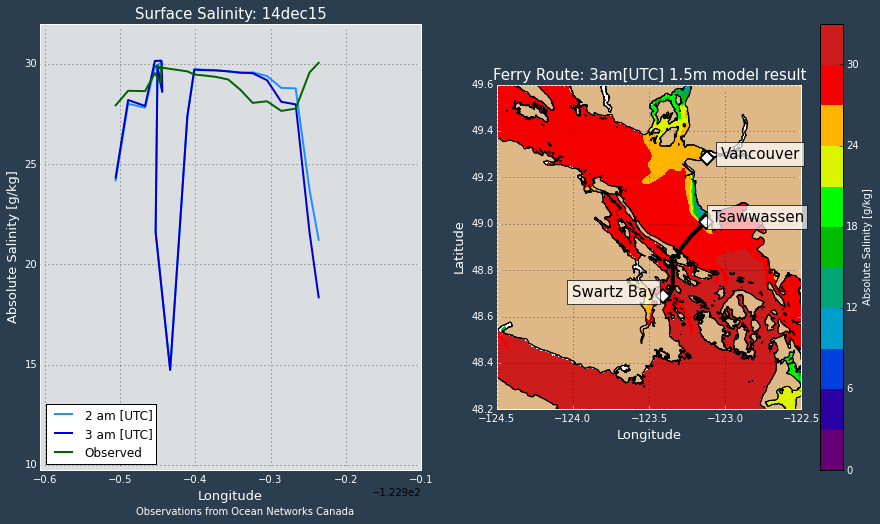

In [42]:
fig = rft.salinity_ferry_route(grid_T_hr, grid_B, bathy, coastline, 'TWSB', dmy)

/home/mdunn/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


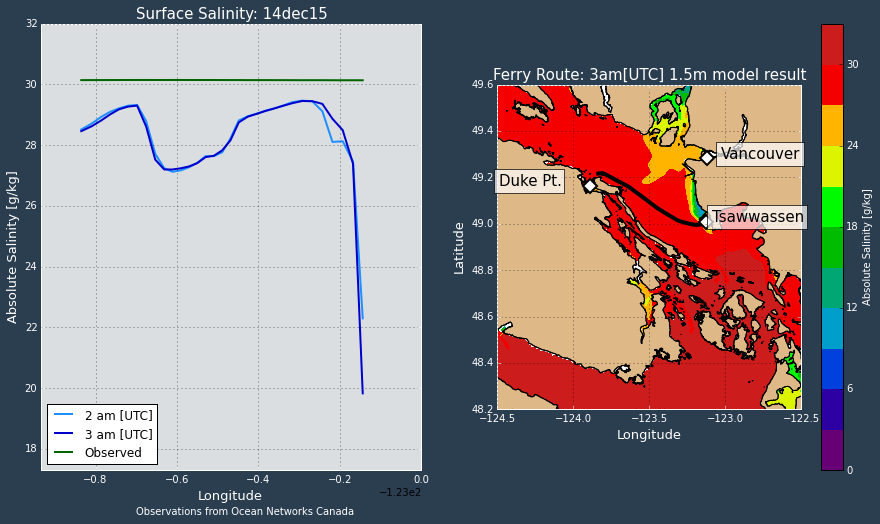

In [43]:
fig = rft.salinity_ferry_route(grid_T_hr, grid_B, bathy, coastline, 'TWDP', dmy)